In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import datetime as dt

C:\Users\user\AppData\Local\Temp/ipykernel_11748/730361768.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [16]:
tickers = ['AAPL', 'TSLA' , 'FB' ,'CTXS' , 'BX' , 'VRSN' , 'CROX' , 'NKE', 'SBUX', '^GSPC']
start = '2020-03-22'
end = '2022-06-18'

data = yf.download(tickers, start , end , interval="1d")
 
data = data['Adj Close']
 
log_returns = np.log(data/data.shift())

cov = log_returns.cov()
var = log_returns['^GSPC'].var()
 
aapl_beta = cov.loc['AAPL', '^GSPC']/var
tsla_beta = cov.loc['TSLA' , '^GSPC']/var
fb_beta =cov.loc['FB','^GSPC']/var
ctxs_beta =cov.loc['CTXS','^GSPC']/var
bx_beta =cov.loc['BX','^GSPC']/var
vrsn_beta =cov.loc['VRSN','^GSPC']/var
crox_beta =cov.loc['CROX','^GSPC']/var
nike_beta =cov.loc['NKE','^GSPC']/var  
sbux_beta =cov.loc['SBUX','^GSPC']/var  

                     

[*********************100%***********************]  10 of 10 completed


In [17]:
beta = []
beta.append(aapl_beta)
beta.append(tsla_beta)
beta.append(fb_beta)
beta.append(ctxs_beta)
beta.append(bx_beta)
beta.append(vrsn_beta)
beta.append(crox_beta)
beta.append(nike_beta)
beta.append(sbux_beta)

names = ['AAPL' , 'TSLA' , 'FB' , 'CTXS' , 'BX', 'VRSN' , 'CROX', 'NIKE' , 'SBUX']
zipped = list(zip(names, beta))

table = pd.DataFrame(zipped, columns=['Name', 'Beta'])

print (table)


   Name      Beta
0  AAPL  1.202405
1  TSLA  1.661991
2    FB  1.365933
3  CTXS  0.484634
4    BX  1.428879
5  VRSN  0.937370
6  CROX  1.842397
7  NIKE  1.077355
8  SBUX  1.144410


In [18]:
tickersg = ['D05.SI','^STI']


datasg = yf.download(tickersg, start , end , interval="1d")

datasg = datasg['Adj Close']

log_returnsg = np.log(datasg/datasg.shift())

covsg = log_returnsg.cov()
varsg = log_returnsg['^STI'].var()
 
dbs_beta = covsg.loc['D05.SI','^STI']/varsg
print (dbs_beta)
new_row = {'Name' : 'DBS' , 'Beta' : dbs_beta}
table = table.append(new_row, ignore_index = True)

sorted_table = table.sort_values(by=['Beta'], ascending=False) 
print(sorted_table)


[*********************100%***********************]  2 of 2 completed
1.2481506400695352
   Name      Beta
6  CROX  1.842397
1  TSLA  1.661991
4    BX  1.428879
2    FB  1.365933
9   DBS  1.248151
0  AAPL  1.202405
8  SBUX  1.144410
7  NIKE  1.077355
5  VRSN  0.937370
3  CTXS  0.484634


In [19]:
aapl_df = yf.download('AAPL', 
                      start, 
                      end, 
                      progress=False)

aapl_df = aapl_df.reset_index(level=0)
aapl = aapl_df['Adj Close']

tsla_df = yf.download('TSLA', 
                      start, 
                      end, 
                      progress=False)
tsla_df = tsla_df.reset_index(level=0)
tsla = tsla_df['Adj Close']

fb_df = yf.download('FB', 
                      start, 
                      end, 
                      progress=False)
fb_df = fb_df.reset_index(level=0)
fb = fb_df['Adj Close']


ctxs_df = yf.download('CTXS', 
                      start, 
                      end, 
                      progress=False)
ctxs_df = ctxs_df.reset_index(level=0)
ctxs = ctxs_df['Adj Close']

bx_df = yf.download('BX', 
                      start, 
                      end, 
                      progress=False)
bx_df = bx_df.reset_index(level=0)
bx = bx_df['Adj Close']


vrsn_df = yf.download('VRSN', 
                      start, 
                      end, 
                      progress=False)
vrsn_df = vrsn_df.reset_index(level=0)
vrsn = vrsn_df['Adj Close']


crox_df = yf.download('CROX', 
                      start, 
                      end, 
                      progress=False)
crox_df = crox_df.reset_index(level=0)
crox = crox_df['Adj Close']

nke_df = yf.download('NKE', 
                      start, 
                      end, 
                      progress=False)
nke_df = nke_df.reset_index(level=0)
nke = nke_df['Adj Close']

sbux_df = yf.download('SBUX', 
                      start, 
                      end, 
                      progress=False)
sbux_df = sbux_df.reset_index(level=0)
sbux = sbux_df['Adj Close']




In [20]:

#riskfree rate = US treasury 10 year
rf = 3.15/100 / 360
def sharpe_ratio (data, rf):
    daily_return = data.pct_change()
    daily_mean =np.mean(daily_return)
    sd = np.std(daily_return)
    daily_sharpe_ratio = (daily_mean  - rf ) / sd
    sharpe = 252**(1/2) * daily_sharpe_ratio
    return sharpe

aapl_sharpe = sharpe_ratio (aapl , rf)
tsla_sharpe = sharpe_ratio (tsla , rf)
fb_sharpe = sharpe_ratio (fb , rf)
ctxs_sharpe = sharpe_ratio (ctxs, rf)
bx_sharpe = sharpe_ratio (bx, rf)
vrsn_sharpe = sharpe_ratio (vrsn, rf)
crox_sharpe = sharpe_ratio (crox, rf)
nke_sharpe = sharpe_ratio (nke, rf)
sbux_sharpe = sharpe_ratio (sbux, rf)






In [21]:
dbs_df = yf.download('D05.SI', 
                      start, 
                      end, 
                      progress=False)
dbs_df = dbs_df.reset_index(level=0)
dbs = dbs_df['Adj Close']

#risk free rate for singapore is Singapore government 10 year bond yield
rf2 = 2.93 / 100 / 365

dbs_sharpe = sharpe_ratio (dbs, rf2)
print (dbs_sharpe)


1.425495977015288


In [22]:
sharpe = []
sharpe.append(aapl_sharpe)
sharpe.append(tsla_sharpe)
sharpe.append(fb_sharpe)
sharpe.append(ctxs_sharpe)
sharpe.append(bx_sharpe)
sharpe.append(vrsn_sharpe)
sharpe.append(crox_sharpe)
sharpe.append(nke_sharpe)
sharpe.append(sbux_sharpe)
sharpe.append(dbs_sharpe)

# names = ['AAPL' , 'TSLA' , 'FB' , 'CTXS' , 'BX', 'VRSN' , 'CROX', 'NIKE' , 'SBUX']

table['Sharpe'] = sharpe
sharpe_sorted = table.sort_values(by=['Sharpe'], ascending=False) 

print(sharpe_sorted)

   Name      Beta    Sharpe
1  TSLA  1.661991  1.624002
9   DBS  1.248151  1.425496
0  AAPL  1.202405  1.261014
4    BX  1.428879  1.244055
6  CROX  1.842397  1.193542
7  NIKE  1.077355  0.829033
8  SBUX  1.144410  0.482381
2    FB  1.365933  0.278339
5  VRSN  0.937370  0.133112
3  CTXS  0.484634 -0.203260


In [23]:
#market data S&P500

sp500_df = yf.download('^GSPC', 
                      start, 
                      end, 
                      progress=False)
sp500_df = sp500_df.reset_index(level=0)
sp500 = sp500_df['Adj Close']
sp500_daily_return = sp500.pct_change()

market_return = sp500_daily_return.mean()*252
print (market_return)

sti_df = yf.download('^STI', 
                      start, 
                      end, 
                      progress=False)
sti_df = sti_df.reset_index(level=0)
sti = sti_df['Adj Close']
sti_daily_return = sti.pct_change()

sti_return = sti_daily_return.mean()*252
print (sti_return)



0.2437964097624233
0.1587400974270904


In [24]:
table.head(10)

,Name,Beta,Sharpe
0,AAPL,1.202405,1.261014
1,TSLA,1.661991,1.624002
2,FB,1.365933,0.278339
3,CTXS,0.484634,-0.203260
4,BX,1.428879,1.244055
5,VRSN,0.937370,0.133112
6,CROX,1.842397,1.193542
7,NIKE,1.077355,0.829033
8,SBUX,1.144410,0.482381
9,DBS,1.248151,1.425496


In [25]:
risked_return = []

for i in range(len(table ['Name'])):
    if table['Name'][i] == 'DBS':
        er = rf2 + (table['Beta'][i] *(sti_return - rf2))
        risked_return.append(er)
    else:
        er = rf + (table['Beta'][i] *(market_return - rf))
        risked_return.append(er)


table['Risk Adjusted Return'] = risked_return
riskedreturn_sorted = table.sort_values(by=['Risk Adjusted Return'], ascending=False) 

print(riskedreturn_sorted)

   Name      Beta    Sharpe  Risk Adjusted Return
6  CROX  1.842397  1.193542              0.449096
1  TSLA  1.661991  1.624002              0.405130
4    BX  1.428879  1.244055              0.348318
2    FB  1.365933  0.278339              0.332978
0  AAPL  1.202405  1.261014              0.293124
8  SBUX  1.144410  0.482381              0.278991
7  NIKE  1.077355  0.829033              0.262649
5  VRSN  0.937370  0.133112              0.228533
9   DBS  1.248151  1.425496              0.198112
3  CTXS  0.484634 -0.203260              0.118197


In [26]:
high_portfolio = pd.DataFrame({'Crox': crox ,'Tsla': tsla, 'Blackstone' : bx})
high_ticker = ['Crox' , 'Tsla'  , 'Blackstone']

medium_port = pd.DataFrame({'FB': fb ,'AAPL': aapl, 'DBS' : dbs})
medium_ticker = ['FB' , 'AAPL' , 'DBS']

low_port = pd.DataFrame({ 'SBUX': sbux, 'NKE' : nke , 'VRSN' : vrsn})
low_ticker = ['SBUX' , 'NKE'  , 'VRSN']

In [27]:
def portfolio_data(dataframe, tickers):
    portfolio_daily_change = dataframe.pct_change()
    portfolio_daily_change = portfolio_daily_change.replace(np.nan, 0)
    portfolio_daily_change += 1
    
    temporary = []
    a= 1000
    for i in range(len(portfolio_daily_change)):
        a = portfolio_daily_change.iloc[i]*a
        temporary.append(a)
    portfolio_total_return = pd.DataFrame(temporary)
    portfolio_total_return['Daily Value'] = portfolio_total_return[tickers].sum(axis = 1)
    
    return portfolio_total_return


In [28]:
high_portfolio_df = portfolio_data (high_portfolio, high_ticker )
medium_portfolio_df = portfolio_data (medium_port, medium_ticker )
low_portfolio_df = portfolio_data(low_port, low_ticker )

In [29]:
high_portfolio_df.tail(10)

,Crox,Tsla,Blackstone,Daily Value
Unnamed 555,4832.535778,8229.984720,3583.589508,16646.110006
Unnamed 556,4835.725644,8250.937842,3614.659312,16701.322797
Unnamed 557,4678.628257,8353.864484,3511.193716,16543.686457
Unnamed 558,4590.111766,8279.260183,3434.273144,16303.645093
Unnamed 559,4291.866017,8021.022689,3246.647466,15559.536173
Unnamed 560,3981.658729,7451.357494,2941.680369,14374.696592
Unnamed 561,4074.960018,7629.348706,2878.334137,14582.642861
Unnamed 562,4166.666679,8047.617793,2919.961838,15134.246310
Unnamed 563,3765.550348,7360.288922,2705.187710,13831.026980
Unnamed 564,3764.752730,7486.702624,2722.381690,13973.837043


In [30]:
from scipy.stats import norm

In [31]:
#MONTE CARLO SIMULATION
def monte_carlo( portfolio, days, futures):
    log_returns = np.log(1 + portfolio['Daily Value'].pct_change())
    mean = log_returns.mean()
    var = log_returns.var()
    drift = mean - (0.5 * var) #check drift
    stdev = log_returns.std()
    
    daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(days, futures)))
    
    current_value = portfolio['Daily Value'].iloc[-1]
    
    simulation_result = np.zeros_like(daily_returns)
    simulation_result[0] = current_value
    for t in range(1, days):
        simulation_result[t] = simulation_result[t - 1] * daily_returns[t]

    simulation_result = pd.DataFrame(simulation_result)
    
    #from this part down is to draw the charts of all possible futures after last day of the dataframe


    current = portfolio['Daily Value']
    current = pd.DataFrame(current)
    full_picture = [current, simulation_result]
    monte_carlo_forecast = pd.concat(full_picture)
    monte_carlo = monte_carlo_forecast.iloc[:,:].values
    
    plt.figure(figsize=(20, 10))
    plt.plot(monte_carlo)

    plt.xlabel('Number of Days', fontsize=20)
    plt.ylabel('Portfolio Value (USD$)', fontsize=20)
    plt.show()
    
    return simulation_result

    
    

HIGH PORTFOLO MONTE CARLO SIMULATION

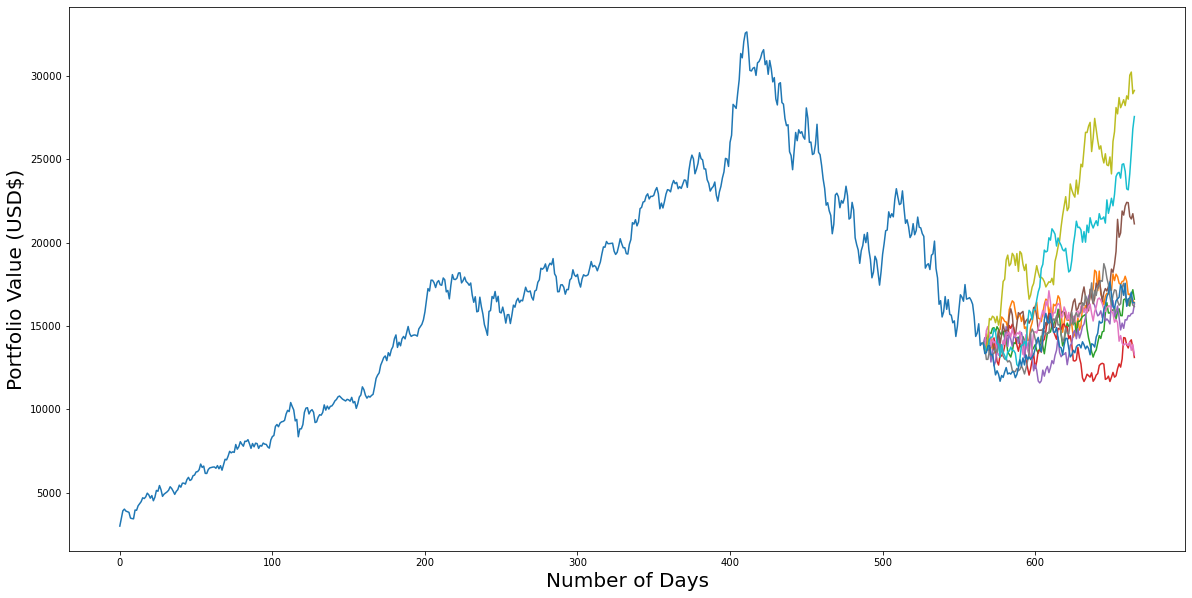

In [42]:
high_portfolio_forecast = monte_carlo(high_portfolio_df, 100,10)

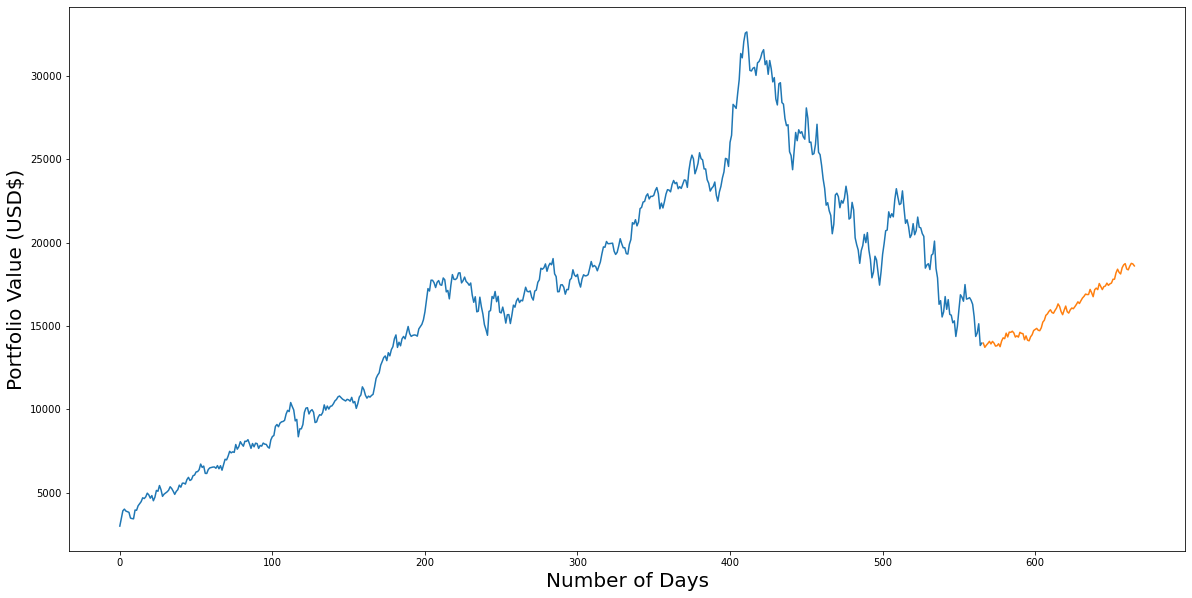

Current Portfolio daily value is  13973.837043340074
Max avg Portfolio in next 100 days is 18756.93358639582
Min avg Portfolio in next 100 days is 13722.51353672776


In [43]:
high_portfolio_forecast ['Forecasted Avg Daily Value'] = high_portfolio_forecast.mean(axis=1)
avg_simulation_high = high_portfolio_forecast['Forecasted Avg Daily Value']

close = high_portfolio_df['Daily Value']
close = pd.DataFrame(close)
frames = [close, avg_simulation_high]
full_dataframe = pd.concat(frames)
full_dataframe = full_dataframe.iloc[:,:].values

plt.figure(figsize=(20, 10))
plt.plot(full_dataframe)
plt.xlabel('Number of Days', fontsize=20)
plt.ylabel('Portfolio Value (USD$)', fontsize=20)
plt.show()

print ('Current Portfolio daily value is ' , avg_simulation_high[0] )

x = avg_simulation_high.max()
print ('Max avg Portfolio in next 100 days is' , x)

y = avg_simulation_high.min()

print ('Min avg Portfolio in next 100 days is' , y)

In [34]:
print ('Standard Deviation of portfolio simulation result is ' , np.std(avg_simulation_high))

Standard Deviation of portfolio simulation result is  1542.3884734003545


In [35]:
high_portfolio_forecast.head(15)

,0,1,2,3,4,5,6,7,8,9,Forecasted Avg Daily Value
0,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043,13973.837043
1,14292.029212,13932.790548,14084.062741,14193.861107,13469.592439,14397.630185,13988.626378,13587.326936,13108.929863,13766.243943,13882.109335
2,14080.575794,14251.264278,13714.386267,14960.433486,14053.833698,14210.544722,13601.058485,13713.577620,12428.974670,13842.246989,13885.689601
3,14194.187421,14218.313025,13961.006310,14651.526023,14073.172736,13229.459323,13789.793530,13501.908130,11789.412533,14598.975383,13800.775441
4,14736.931316,14896.582840,13829.914953,13685.731958,14557.587093,13538.226705,13450.930835,13550.745874,11829.604518,14265.122052,13834.137815
5,15011.186820,14803.939341,13547.804838,12802.839801,14010.941120,13742.864233,13895.845444,13263.835983,11313.885525,14210.731042,13660.387415
6,14811.240383,15259.879230,12715.642351,13060.189357,13849.236483,14428.810577,13716.130953,13815.945810,11829.512083,14210.219584,13769.680681
7,15002.702872,14484.379944,11955.182428,14028.180399,14058.942186,15618.742854,13448.130361,13829.170737,11588.708498,14846.559748,13886.070003
8,15076.514896,15077.928623,12283.493973,14539.049343,13256.642137,16006.598074,14248.544687,13527.256346,12116.183110,14964.833859,14109.704505
9,15293.856940,14699.699266,11916.627523,15135.909762,12722.780421,16026.806480,14598.000947,12814.980370,12051.894941,14563.963229,13982.451988


MEDIUM PORTFOLIO MONTE CARLO SIMULATION

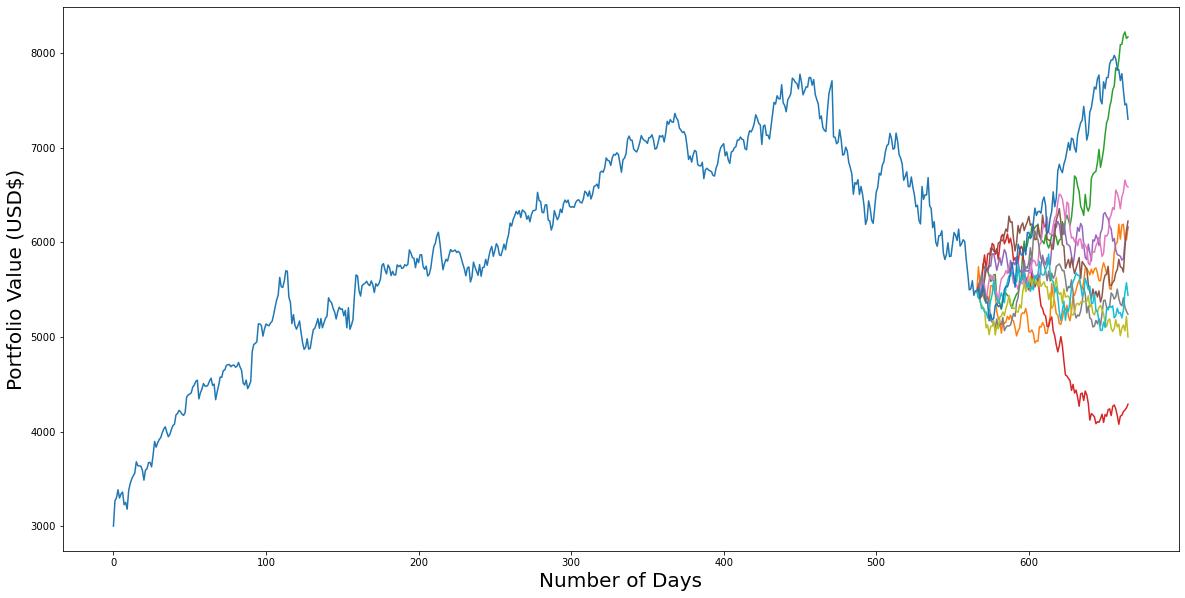

In [36]:
medium_portfolio_forecast = monte_carlo(medium_portfolio_df, 100,10)

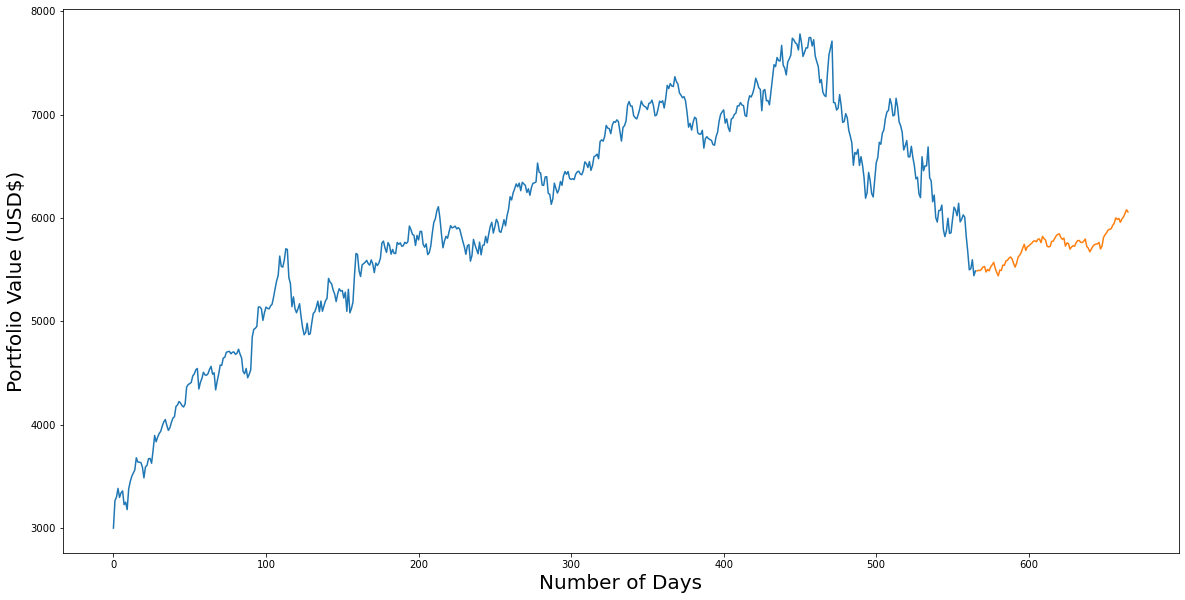

Current Portfolio daily value is  5487.26339825381
Max avg Portfolio in next 100 days is 6078.798669482043
Min avg Portfolio in next 100 days is 5439.866665738225


In [37]:
medium_portfolio_forecast['Forecasted Avg Daily Value'] = medium_portfolio_forecast.mean(axis=1)
avg_simulation_medium = medium_portfolio_forecast['Forecasted Avg Daily Value']

close2 = medium_portfolio_df['Daily Value']
close2 = pd.DataFrame(close2)
frames2 = [close2, avg_simulation_medium]
full_dataframe2 = pd.concat(frames2)
full_dataframe2 = full_dataframe2.iloc[:,:].values

plt.figure(figsize=(20, 10))
plt.plot(full_dataframe2)
plt.xlabel('Number of Days', fontsize=20)
plt.ylabel('Portfolio Value (USD$)', fontsize=20)
plt.show()

print ('Current Portfolio daily value is ' , avg_simulation_medium[0] )
x = avg_simulation_medium.max()
print ('Max avg Portfolio in next 100 days is' , x)

y = avg_simulation_medium.min()

print ('Min avg Portfolio in next 100 days is' , y)

In [38]:
print ('Standard Deviation of portfolio simulation result is ' , np.std(avg_simulation_medium))

Standard Deviation of portfolio simulation result is  148.76228671635022


LOW PORTFOLIO MONTE CARLO SIMULATION

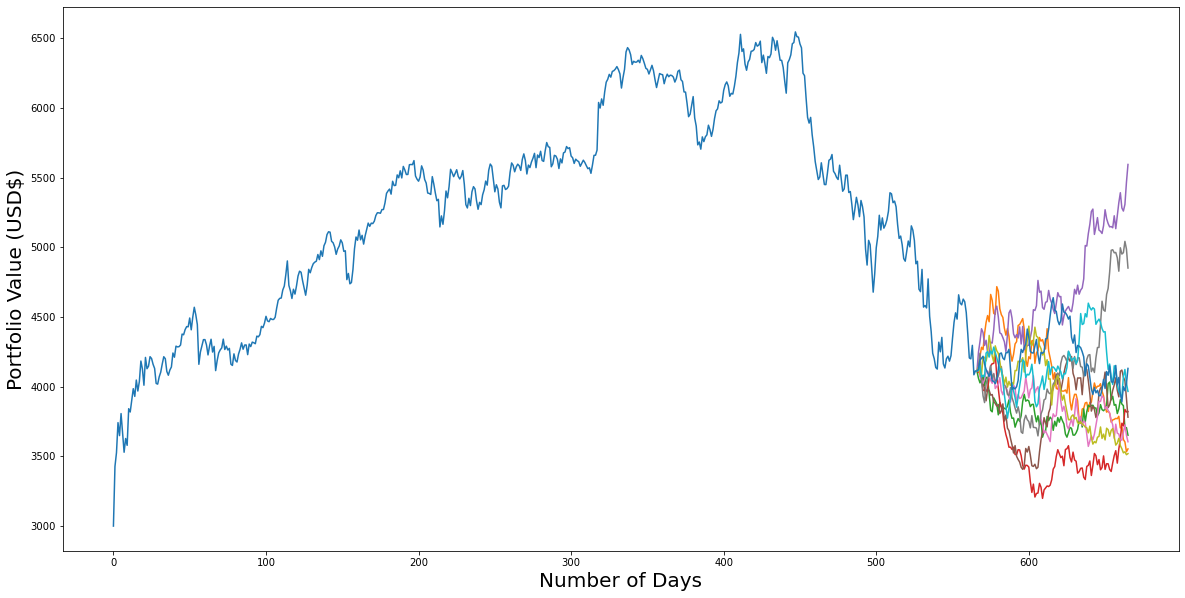

In [39]:
low_portfolio_forecast = monte_carlo(low_portfolio_df, 100,10)

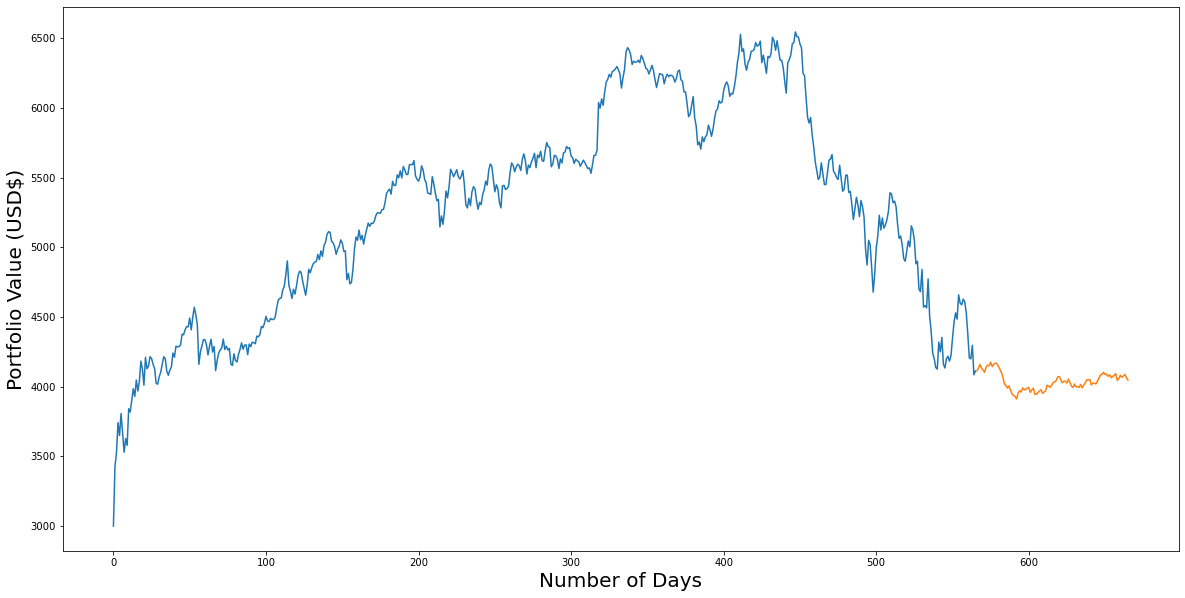

Current Portfolio daily value is  4112.482134613243
Max avg Portfolio in next 100 days is 4175.8415424544655
Min avg Portfolio in next 100 days is 3912.0135475171105


In [40]:
low_portfolio_forecast['Forecasted Avg Daily Value'] = low_portfolio_forecast.mean(axis=1)
avg_simulation_low = low_portfolio_forecast['Forecasted Avg Daily Value']

close3 = low_portfolio_df['Daily Value']
close3 = pd.DataFrame(close3)
frames3 = [close3, avg_simulation_low]
full_dataframe3 = pd.concat(frames3)
full_dataframe3 = full_dataframe3.iloc[:,:].values

plt.figure(figsize=(20, 10))
plt.plot(full_dataframe3)
plt.xlabel('Number of Days', fontsize=20)
plt.ylabel('Portfolio Value (USD$)', fontsize=20)
plt.show()
print ('Current Portfolio daily value is ' , avg_simulation_low[0] )
x = avg_simulation_low.max()
print ('Max avg Portfolio in next 100 days is' , x)

y = avg_simulation_low.min()

print ('Min avg Portfolio in next 100 days is' , y)

In [41]:
print ('Standard Deviation of portfolio simulation result is ' , np.std(avg_simulation_low))

Standard Deviation of portfolio simulation result is  62.43507658849201


The Capital Asset Pricing Model (CAPM) measures the expected rate of return vs. the amount of
risk for a particular equity, or a portfolio of equities.
Let’s consider these 10 equities (I’m putting in the beta from Yahoo finance, but you can calculate
the beta using the S&P 500 (SPY) as the market average/expectation. Your calculated beta may
come out to dfferent values:

• AAPL (Apple Inc) Beta 1.19

• TSLA (Tesla, Inc.) Beta 2.12

• FB (Meta Platforms, Inc.) Beta 1.37

• D05.SI ( DBS Group Holdings Ltd) Beta 1.14

• CTXS (Citrix Systems, Inc.) Beta 0.04

• BX Blackstone Inc.) Beta 1.38

• VRSN (Verisign) Beta 1.01*

• CROX (Crocs, Inc) Beta 1.85

• NKE (Nike) Beta 0.96

• SBUX (Starbucks) Beta 0.97

Using this limited set of equities, create three equity potfolios, a “high-risk, high return” portfolio.
A “medium-risk, medium return” portfolio, and a “lower risk, lower return portfolio”. Using Monte
Carlo simulations, project how each portfolio may perform and what the outcome may be 100
days (3+ months) in the future.

For this project, compute the compute the Sharpe Ratio, the risk-adjusted returns and the Beta of
every stock over the previous two years, up to the date you complete/submit your project.

Your report should cover how you selected the equities for each portfolio type, the analysis of the
equities in the portfolio, as well as the projections and probabilities for the portfolio at the end of
the next 100 trading days. Each portfolio can be made up of any combination of the equities, they
don’t have to be exclusive to one portfolio. Any insights or observations about the process, it’s
benefits and shortcomings should be addressed in the report.
